In [1]:
import pandas as pd 
import numpy as np 
%matplotlib inline 
import matplotlib.pyplot as plt

In [2]:
x = np.linspace(0,50,501)

In [3]:
y = np.sin(x)

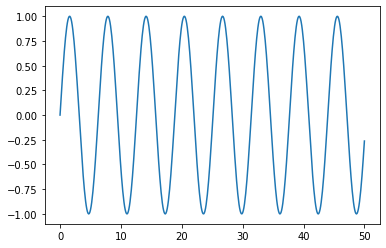

In [4]:
plt.plot(x,y)

In [15]:
df = pd.DataFrame(data= y, index=x, columns=['Sine'])
df

,Sine
0.0,0.000000
0.1,0.099833
0.2,0.198669
0.3,0.295520
0.4,0.389418
...,...
49.6,-0.617439
49.7,-0.535823
49.8,-0.448854
49.9,-0.357400


# Grabbing the data 
 from first to the end of training data. 
 ie. the data is 500 data point then we take 10% of the data and use
 df.iloc[:test_index] to grab the data for training data
 df.iloc[test_index:] to grab data for testing

In [7]:
test_percent = 0.1

In [8]:
len(df) * test_percent

50.1

In [9]:
test_point = np.round(len(df)* test_percent)

In [10]:
test_point

50.0

In [12]:
test_ind =int(len(df)-test_point)
test_ind

451

In [13]:
train = df.iloc[:test_ind]

In [14]:
test=df.iloc[test_ind:]

In [18]:
from sklearn.preprocessing import MinMaxScaler

In [19]:
scaler =MinMaxScaler()

In [20]:
scaler.fit(train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [22]:
scaled_train = scaler.transform(train)

In [23]:
scaled_test = scaler.transform(test)

In [33]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [43]:
length =50
batch_size =1
generator =TimeseriesGenerator(scaled_train, scaled_train, length=length, batch_size=batch_size)

In [42]:
X, y = generator[0]

In [44]:
from tensorflow.keras.models import Sequential 

In [45]:
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM

In [46]:
n_features = 1

In [47]:
model= Sequential()

In [48]:
model.add(SimpleRNN(50, input_shape=(length, n_features)))

In [49]:
model.add(Dense(1))

In [50]:
model.compile(optimizer='adam', loss='mse')

In [52]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 50)                2600      
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 2,651
Trainable params: 2,651
Non-trainable params: 0
_________________________________________________________________


In [53]:
model.fit_generator(generator, epochs=5)

Epoch 1/5
401/401 [==============================] - 181s 450ms/step - loss: 0.0039
Epoch 2/5
401/401 [==============================] - 167s 416ms/step - loss: 2.9321e-04
Epoch 3/5
401/401 [==============================] - 190s 474ms/step - loss: 5.2576e-05
Epoch 4/5
401/401 [==============================] - 178s 445ms/step - loss: 4.2097e-04
Epoch 5/5
401/401 [==============================] - 163s 407ms/step - loss: 4.5686e-05


In [55]:
losses= pd.DataFrame(model.history.history)

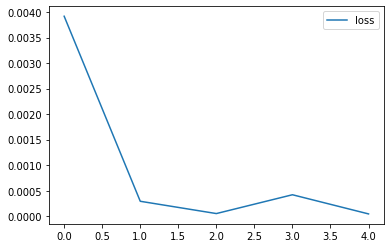

In [56]:
losses.plot()

In [57]:
first_eval_batch = scaled_train[-length:]

In [58]:
first_eval_batch = first_eval_batch.reshape((1, length, n_features))

In [59]:
model.predict(first_eval_batch)

array([[0.9469844]], dtype=float32)

In [60]:
scaled_test[0]

array([0.94955134])

In [61]:
test_predictions =[]
first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

In [67]:
# current_batch

In [66]:
# predicted_value=[[[99]]]
# np.append(current_batch[:,1:,:],[[[99]]], axis=1)

In [79]:
test_predictions =[]
first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))
for i in range(len(test)):
    current_pred = model.predict(current_batch)[0]
    test_predictions.append(current_pred)
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]], axis=1)

In [80]:
test_predictions

[array([0.9469844], dtype=float32),
 array([0.9657087], dtype=float32),
 array([0.97974247], dtype=float32),
 array([0.9874042], dtype=float32),
 array([0.9898399], dtype=float32),
 array([0.9882855], dtype=float32),
 array([0.9820867], dtype=float32),
 array([0.96989167], dtype=float32),
 array([0.95323646], dtype=float32),
 array([0.9333584], dtype=float32),
 array([0.90889645], dtype=float32),
 array([0.8800618], dtype=float32),
 array([0.8479878], dtype=float32),
 array([0.8129193], dtype=float32),
 array([0.7746621], dtype=float32),
 array([0.7335446], dtype=float32),
 array([0.6905419], dtype=float32),
 array([0.6453449], dtype=float32),
 array([0.5984999], dtype=float32),
 array([0.5507344], dtype=float32),
 array([0.5020384], dtype=float32),
 array([0.45266962], dtype=float32),
 array([0.40375826], dtype=float32),
 array([0.3559341], dtype=float32),
 array([0.308919], dtype=float32),
 array([0.26318827], dtype=float32),
 array([0.2207971], dtype=float32),
 array([0.18162581], d

In [81]:
true_predictions = scaler.inverse_transform(test_predictions)

In [83]:
test['Predictions']=true_predictions

/Users/fredyyudiawan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


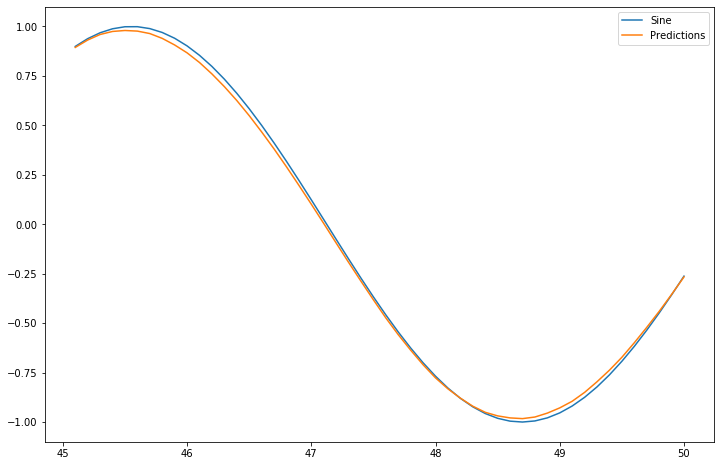

In [84]:
test.plot(figsize=(12,8))

# LSTM portions and early stopping

In [85]:
from tensorflow.keras.callbacks import EarlyStopping

In [91]:
early_stop = EarlyStopping(monitor='val_loss', patience=2)

In [92]:
length=49
generator = TimeseriesGenerator(scaled_train, scaled_train, length=length, batch_size=1)

validation_generator = TimeseriesGenerator(scaled_test, scaled_test, length=length, batch_size=1)

In [93]:
model= Sequential()

model.add(LSTM(50, input_shape=(length, n_features)))

model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')

In [94]:
model.fit_generator(generator, epochs=20, validation_data=validation_generator, callbacks=[early_stop])

Epoch 1/20
402/402 [==============================] - 405s 1s/step - loss: 0.0152 - val_loss: 1.3265e-04
Epoch 2/20
402/402 [==============================] - 388s 966ms/step - loss: 4.1103e-05 - val_loss: 9.9021e-05
Epoch 3/20
402/402 [==============================] - 415s 1s/step - loss: 8.7890e-05 - val_loss: 5.0442e-05
Epoch 4/20
402/402 [==============================] - 403s 1s/step - loss: 2.5602e-04 - val_loss: 1.2636e-05
Epoch 5/20
402/402 [==============================] - 427s 1s/step - loss: 5.8801e-05 - val_loss: 3.0158e-07
Epoch 6/20
402/402 [==============================] - 480s 1s/step - loss: 1.9603e-04 - val_loss: 6.2594e-07
Epoch 7/20
402/402 [==============================] - 508s 1s/step - loss: 5.9887e-05 - val_loss: 1.8884e-05


In [95]:
test_predictions =[]
first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))
for i in range(len(test)):
    current_pred = model.predict(current_batch)[0]
    test_predictions.append(current_pred)
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]], axis=1)

/Users/fredyyudiawan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


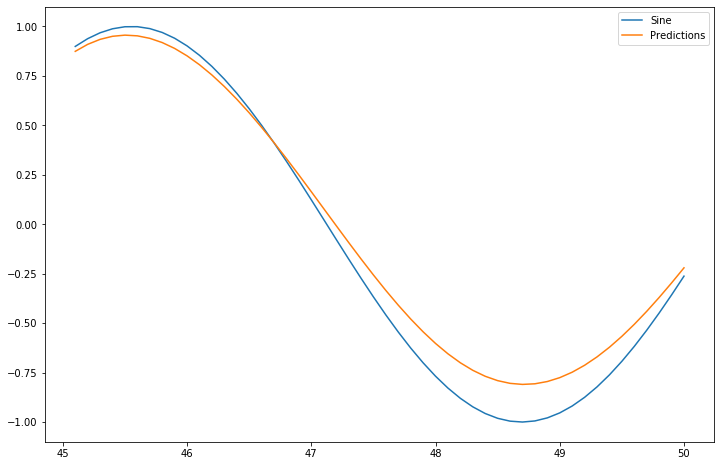

In [96]:
true_predictions = scaler.inverse_transform(test_predictions)
test['Predictions']=true_predictions
test.plot(figsize=(12,8))

# forecasting sections!

In [101]:
full_scaler = MinMaxScaler()
scaled_full_data = full_scaler.fit_transform(df)

In [102]:
length =50
generator = TimeseriesGenerator(scaled_full_data, scaled_full_data, length=length, batch_size=1)

In [104]:
model = Sequential()
model.add(LSTM(50, input_shape=(length, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
model.fit_generator(generator,epochs=7)

Epoch 1/7
451/451 [==============================] - 411s 911ms/step - loss: 0.0142
Epoch 2/7
451/451 [==============================] - 412s 914ms/step - loss: 8.6971e-05
Epoch 3/7
451/451 [==============================] - 419s 928ms/step - loss: 2.4405e-04
Epoch 4/7
451/451 [==============================] - 401s 888ms/step - loss: 4.8892e-05
Epoch 5/7
451/451 [==============================] - 400s 886ms/step - loss: 3.8593e-04
Epoch 6/7
451/451 [==============================] - 398s 882ms/step - loss: 4.8940e-05
Epoch 7/7
451/451 [==============================] - 400s 888ms/step - loss: 5.5882e-05


In [105]:
forecast =[]

first_eval_batch = scaled_full_data[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(len(test)):
    
    # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)[0]
    
    # store prediction
    forecast.append(current_pred) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [106]:
forecast = scaler.inverse_transform(forecast)

In [107]:
len(forecast)

50

In [108]:
forecast_index = np.arange(50.1,55.1,step=0.1)

In [109]:
len(forecast_index)

50

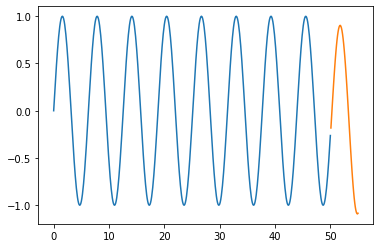

In [110]:
plt.plot(df.index,df['Sine'])
plt.plot(forecast_index,forecast)